<a href="https://colab.research.google.com/github/rfajri27/a555-eda/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AMAZON SALES - ANALYST**
By : Albertman Barasa

##  **Contents:**

* [1. Imports](#1)
* [2. Loading the dataset](#2)
* [3. Quick look into the dataset](#3)
* [4. Data Preprocessing](#4)
* [5. Summary statistics](#5)
* [6. Exploratory Data Analysis (EDA)](#6)
* [7. Correlation Analysis](#7)


<a name='1'></a>

## **1. Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


<a name='2'></a>
    
## **2. Loading the Dataset**

In [2]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/allbertmann/AmazonSales_Analyst/refs/heads/main/amazon.csv")

*Set the option to show maximum columns*

In [3]:
pd.set_option('display.max_columns', None)

*Get a sneak peek of data*

The purpose of a sneak peek is to get a quick overview of the data and identify any potential problems or areas of interest.

In [4]:
sales_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


<a name='3'></a>
## **3. Quick Look into the dataset**

**About Dataset**
<br>
<br>
This dataset is having the data of 1K+ Amazon Product's Ratings and ,Reviews as per their details listed on the official website of Amazon. <br>
<br>
*Source :* https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset
<br>
<br>
**Features :**
<br>
<br>
**1. product_id** - Product ID <br>
**2. product_name** - Name of the Product <br>
**3. category** - Category of the Product <br>
**4. discounted_price** - Discounted Price of the Product <br>
**5. actual_price** - Actual Price of the Product <br>
**6. discount_percentage** - Percentage of Discount for the Product <br>
**7. rating** - Rating of the Product <br>
**8. rating_count** - Number of people who voted for the Amazon rating <br>
**9. about_product** - Description about the Product <br>
**10. user_id** - ID of the user who wrote review for the Product <br>
**11. user_name** - Name of the user who wrote review for the Product <br>
**12. review_id** - ID of the user review <br>
**13. review_title** - Short review <br>
**14. review_content** - Long review <br>
**15. img_link** - Image Link of the Product <br>
**16. product_link** - Official Website Link of the Product <br>

In [5]:
sales_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
sales_df.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


*Let's have a look on the shape of the dataset.*

In [7]:
print(f"The number of rows are {sales_df.shape[0]}, and columns are {sales_df.shape[1]}.")

The number of rows are 1465, and columns are 16.


In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [9]:
sales_df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [10]:
sales_df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [11]:
print("Count Duplicates: ", sales_df.duplicated().sum())

Count Duplicates:  0


##### **Observation - 1**

* There are 1465 rows and 16 columns in the dataset.
* The data type of all columns is object.
* The columns in the datasets are:
* There are a few missing values in the dataset, which we will read in detail and deal with later on in the notebook.

<a name='4'></a>
## **4. Data Preprocessing**

#### *Changing Data Types of Columns*

In [12]:
sales_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [13]:
# changing the data type of discounted price and actual price
sales_df['discounted_price'] = sales_df['discounted_price'].str.replace('₹', '')
sales_df['discounted_price'] = sales_df['discounted_price'].str.replace(',', '')
sales_df['discounted_price'] = sales_df['discounted_price'].astype('float64')

sales_df['actual_price'] = sales_df['actual_price'].str.replace('₹', '')
sales_df['actual_price'] = sales_df['actual_price'].str.replace(',', '')
sales_df['actual_price'] = sales_df['actual_price'].astype('float64')

In [14]:
# changing the data type of discount percentage
sales_df['discount_percentage'] = sales_df['discount_percentage'].str.replace('%', '').astype('float64')
sales_df['discount_percentage'] = sales_df['discount_percentage'] / 100

In [15]:
sales_df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [16]:
# check data string
sales_df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [17]:
product_link = sales_df.query('rating == "|"')['product_link']
print(product_link)

1279    https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...
Name: product_link, dtype: object


In [18]:
img_link = sales_df.query('rating == "|"')['img_link']
print(img_link)

1279    https://m.media-amazon.com/images/W/WEBP_40237...
Name: img_link, dtype: object


In [19]:
review_title = sales_df.query('rating == "|"')['review_title']
print(review_title)

1279    Decent product,doesn't pick up sand,Ok ok,Must...
Name: review_title, dtype: object


In [20]:
review_content = sales_df.query('rating == "|"')['review_content']
print(review_content)

1279    Does the job well,doesn't work on sand. though...
Name: review_content, dtype: object


I check the product link and img link still don't have a clue about this rating. but, i look the review and still don't get it the rating. So, i decided to replace these string with median of rating


In [21]:
# convert the 'rating' column to numeric, setting invalid entries to NaN
sales_df['rating'] = pd.to_numeric(sales_df['rating'], errors='coerce')

In [22]:
# calculate the median of valid ratings
median_rating = sales_df['rating'].median()
median_rating

4.1

In [23]:
# replace median to Nan
sales_df['rating'].fillna(median_rating, inplace=True)

In [24]:
# check data string again
sales_df.query('product_id == "B08L12N5H1"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,4.1,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [25]:
# Changing Rating Columns Data Type
sales_df['rating'] = sales_df['rating'].astype('float64')

# Changing 'rating_count' Column Data Type
sales_df['rating_count'] = sales_df['rating_count'].str.replace(',', '').astype('float64')

In [26]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

##### **Observation - 2**

* Before preprocessing, all coloumn was a object data type. And then, some coloumns I converted to float data type. **bold text**

#### *Handle the Missing Values*

In [27]:
sales_df.isnull().sum().sort_values(ascending = False)

,0
rating_count,2
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
about_product,0
user_id,0


In [28]:
# Find missing values percentage in the data
round(sales_df.isnull().sum() / len(sales_df) * 100, 2).sort_values(ascending=False).map(lambda x: f'{x:.2f}%')

,0
rating_count,0.14%
product_id,0.00%
product_name,0.00%
category,0.00%
discounted_price,0.00%
actual_price,0.00%
discount_percentage,0.00%
rating,0.00%
about_product,0.00%
user_id,0.00%


In [29]:
# Let's see the data contain null values
sales_df[sales_df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [30]:
# Let's do the same thing with rating_count coloumn

# impute the median of valid ratings
sales_df['rating_count'] = sales_df.rating_count.fillna(value=sales_df['rating_count'].median())


In [31]:
sales_df.isnull().sum().sort_values(ascending = False)

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


##### **Observation - 3**

* Now, all data columns is clean.

#### *Checking Duplicate Values*

In [32]:
sales_df.duplicated().sum()

0

##### **Observation - 4**

* Our data don't have duplicate values.

<a name='5'></a>
## **5. Summary statistics**

In [33]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [34]:
sales_df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.096587,18277.634812
std,6944.304394,10874.826864,0.216359,0.291574,42727.398216
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1191.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17325.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [35]:
sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
discounted_price,1465.0,3125.310874,6944.304394,39.0,325.00,799.0,1999.00,77990.00
actual_price,1465.0,5444.990635,10874.826864,39.0,800.00,1650.0,4295.00,139900.00
discount_percentage,1465.0,0.476915,0.216359,0.0,0.32,0.5,0.63,0.94
rating,1465.0,4.096587,0.291574,2.0,4.00,4.1,4.30,5.00
rating_count,1465.0,18277.634812,42727.398216,2.0,1191.00,5179.0,17325.00,426973.00


<a name='6'></a>
## **6. Exploratory Data Analysis (EDA) ⏳**

### Q1. What is the distribution of discount percentages across products?

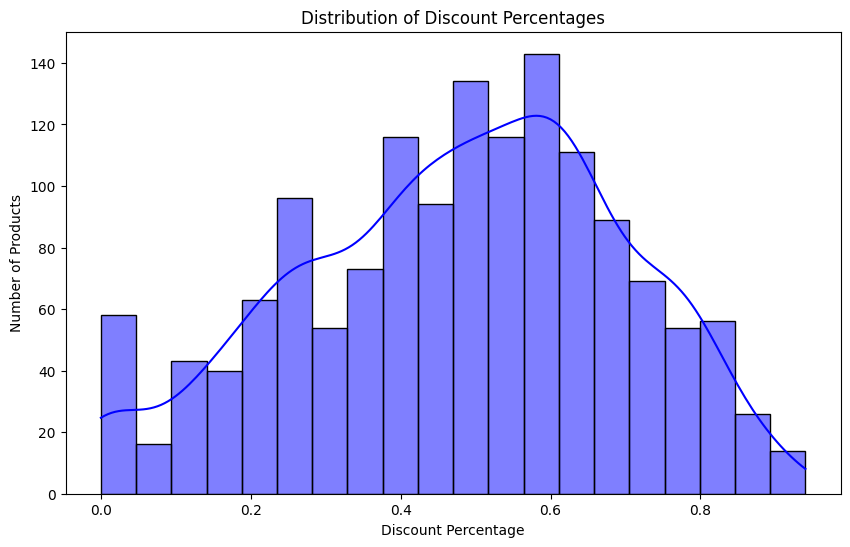

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(sales_df['discount_percentage'], bins=20, kde=True, color='blue')
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Products')
plt.show()

#### **Answer Q1:**

Key_Obeservations:
*   The most frequent discount range appears to be 40% - 60%, where most products are clustered.
*   There are fewer products with very high discounts (>80%) and very low discounts (<10%).
*   The KDE (Kernel Density Estimation) curve (blue line) smoothly represents the overall trend, showing that discounts gradually increase and peak around 60%, then decline.

Insight:
*   Many products receive moderate discounts (40-60%), which might indicate common promotional strategies.
*   Few products have extreme discounts (near 0% or close to 90%), possibly  suggesting premium-priced items or clearance sales.
*   Businesses may focus on keeping most discounts within the optimal sales-driving range rather than offering extreme markdowns.

### Q2: Which product categories have the highest average discount?

In [37]:
category_discount = sales_df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
category_discount.head(10)

,discount_percentage
category,
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms,0.900
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,0.900
"Electronics|Headphones,Earbuds&Accessories|Earpads",0.900
"Electronics|Headphones,Earbuds&Accessories|Adapters",0.880
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers",0.875
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts,0.820
Computers&Accessories|Components|InternalHardDrives,0.800
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,0.785
Electronics|Mobiles&Accessories|MobileAccessories|Stands,0.764


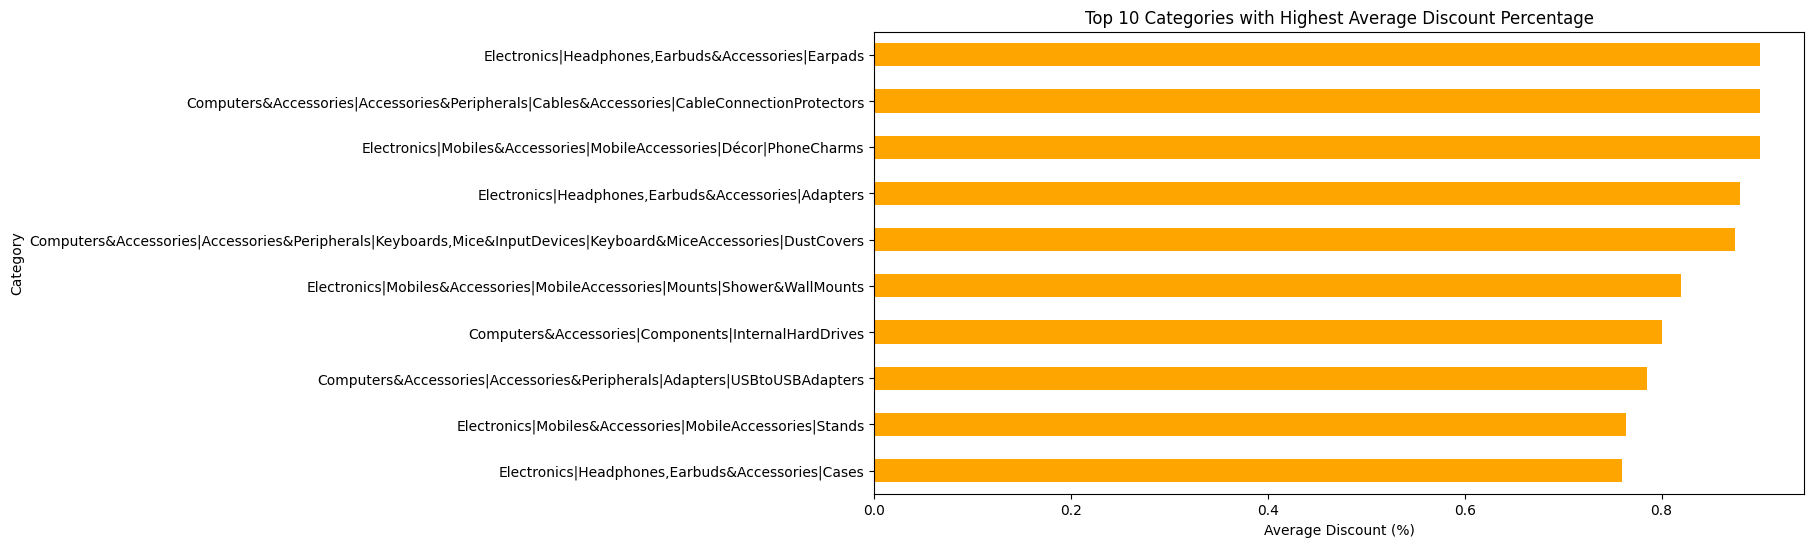

In [38]:
plt.figure(figsize=(12, 6))
category_discount.head(10).sort_values().plot(kind='barh', color='orange')  # Horizontal bar chart
plt.title('Top 10 Categories with Highest Average Discount Percentage')
plt.xlabel('Average Discount (%)')
plt.ylabel('Category')
plt.show()

#### **Answer Q2:**

Key_Observations:
* Top Discount Categories: The categories with the highest discounts are mostly Electronics and Computers & Accessories.
* Popular Items: Headphones, mobile accessories (like chargers and mounts), and computer parts (like cables and hard drives) get the most discounts.
* Why Discounts?: These items are probably discounted to attract more customers, clear out old stock, or compete with other sellers.

Insight:<br>
> The data suggests that retailers are focusing on offering discounts in highly competitive and fast-evolving categories like Electronics and Computers & Accessories. These categories likely have higher margins or faster turnover rates, making them ideal for discount strategies to drive sales volume. The emphasis on mobile and headphone accessories could reflect consumer trends towards mobile technology and personal audio, areas where consumers are more price-sensitive and responsive to discounts. Retailers might be using these discounts to clear older stock, promote new products, or increase market share in these competitive segments

### Q3: What is the relationship between rating and discounted price?

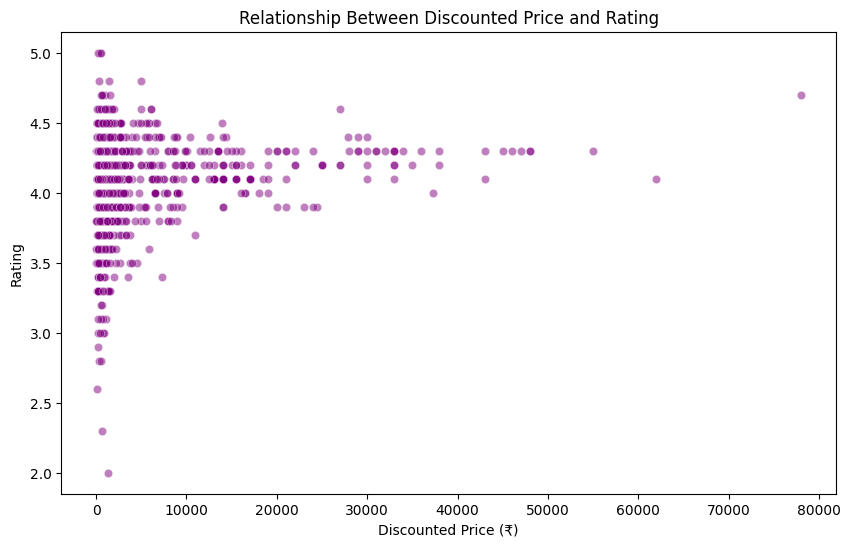

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sales_df['discounted_price'], y=sales_df['rating'], alpha=0.5, color='purple')
plt.title('Relationship Between Discounted Price and Rating')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
plt.show()

#### **Answer Q3:**

Key_Observations:
* Graph Overview: The graph shows how product ratings change with different discounted prices.
* Trend: As the discounted price increases (up to 80,000%), the ratings generally stay between 2.0 and 5.0. There isn't a clear upward or downward trend, meaning higher discounts don't necessarily lead to higher or lower ratings.
* Variability: Ratings are spread out across all discount levels, indicating that other factors besides price might influence how customers rate products.

Insight:
* The graph suggests that offering bigger discounts doesn't always mean customers will give higher ratings. People might care more about the product's quality or features than just the price.
* Customers might prioritize value for money over just low prices. A high discount on a low-quality product might not lead to better ratings, while a moderately discounted high-quality product could receive higher ratings. This indicates that while discounts can attract buyers, maintaining product quality is crucial for positive customer feedback.

### Q4: Which product has the highest number of ratings?

In [40]:
top_rated_products = sales_df.nlargest(10, 'rating_count')
top_rated_products

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",219.0,700.0,0.69,4.4,426973.0,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...
47,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","Electronics|HomeTheater,TV&Video|Accessories|C...",309.0,475.0,0.35,4.4,426973.0,Please select appropriate display resolution &...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41bCxnHksn...,https://www.amazon.in/AmazonBasics-High-Speed-...
65,B014I8SX4Y,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","Electronics|HomeTheater,TV&Video|Accessories|C...",309.0,1400.0,0.78,4.4,426973.0,HDMI A Male to A Male Cable: Supports Ethernet...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41eJqkFjCR...,https://www.amazon.in/AmazonBasics-High-Speed-...
684,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",219.0,700.0,0.69,4.4,426972.0,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...
352,B07GPXXNNG,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",349.0,999.0,0.65,4.1,363713.0,The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31J6I7SrLX...,https://www.amazon.in/Boat-BassHeads-100-Inspi...
400,B07GQD4K6L,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",379.0,999.0,0.62,4.1,363713.0,The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31qVddHyy5...,https://www.amazon.in/Boat-BassHeads-100-Inspi...
584,B071Z8M4KX,boAt BassHeads 100 in-Ear Wired Headphones wit...,"Electronics|Headphones,Earbuds&Accessories|Hea...",365.0,999.0,0.63,4.1,363711.0,The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.med

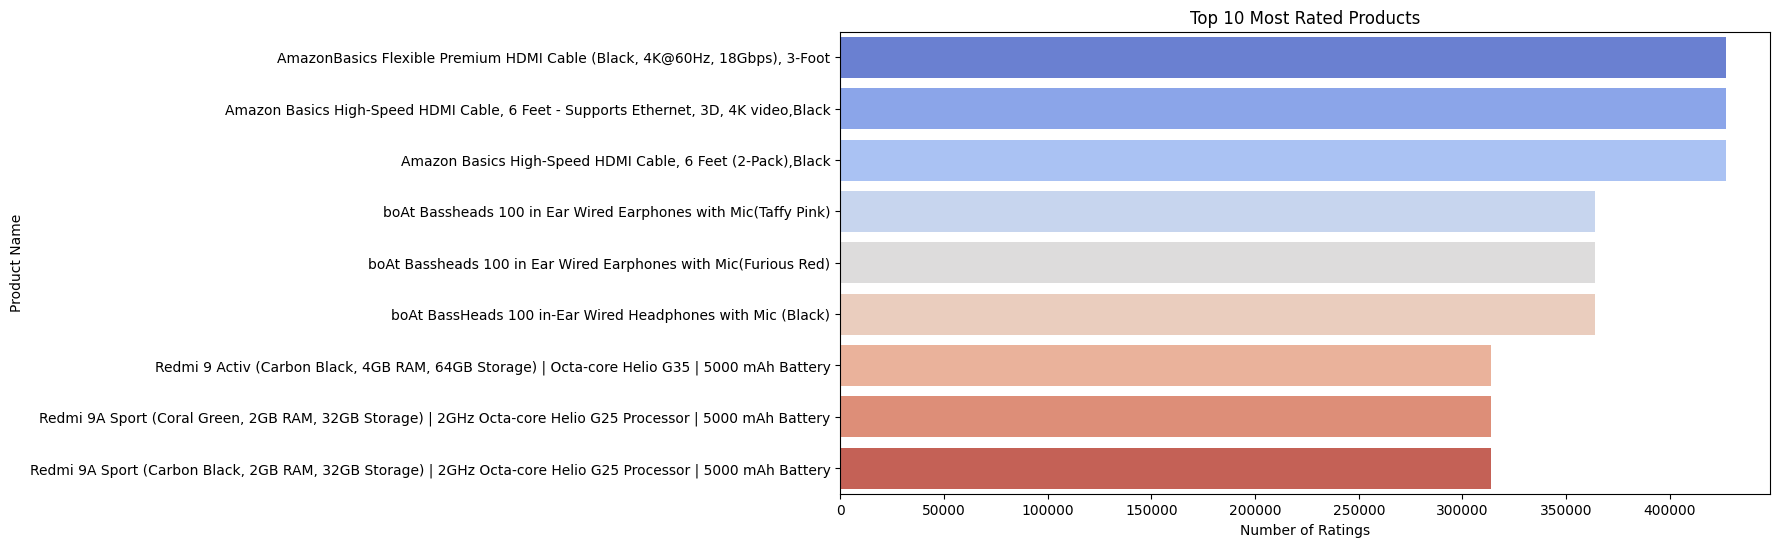

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(y=top_rated_products['product_name'], x=top_rated_products['rating_count'], palette='coolwarm')
plt.title('Top 10 Most Rated Products')
plt.xlabel('Number of Ratings')
plt.ylabel('Product Name')
plt.show()


#### **Answer Q4:**

Key_Observations:
* Top Product: The product with the highest number of ratings is the Amazon Basics Flexible Premium HDMI Cable (Black, 4x@60Hz, 180bps), 3-Foot+.
* High Popularity: This HDMI cable has significantly more ratings compared to the other listed products, reaching up to 350,000 ratings.

Insight:
> The Amazon Basics HDMI cable is very popular among customers, as shown by the large number of ratings it has received. This suggests that it is a widely purchased and trusted product, likely due to its quality, reliability, or value for money. High ratings volume often indicates strong customer interest and satisfaction.

### Q5: What is the distribution of ratings across all products?

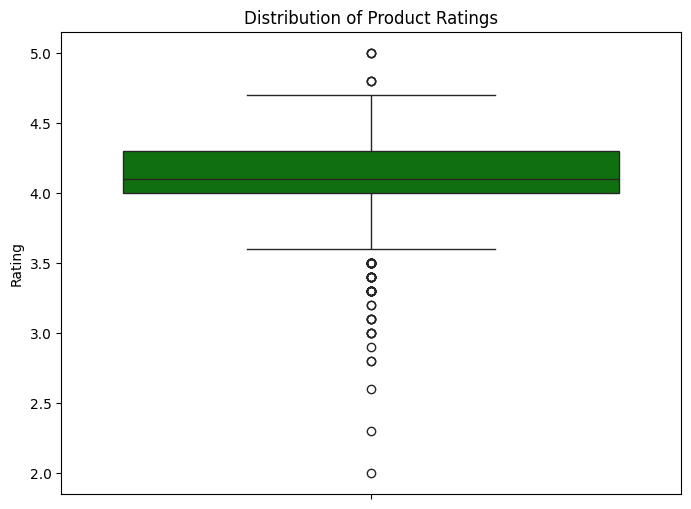

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=sales_df['rating'], color='green')
plt.title('Distribution of Product Ratings')
plt.ylabel('Rating')
plt.show()

#### **Answer Q5:**

Key_Observations:
* Rating Range: The ratings for products range from 2.0 to 5.0.
* Common Ratings: Most products seem to have ratings clustered around the higher end, particularly between 4.0 and 5.0.
* Lower Ratings: There are fewer products with ratings below 3.0, indicating that most products are generally well-received by customers.

Insight:
> The majority of products receive high ratings (4.0 to 5.0), suggesting that customers are generally satisfied with their purchases. Products with lower ratings (below 3.0) are less common, which could mean that either fewer products are of low quality or that customers are more likely to purchase and rate products they are happy with. This distribution highlights a positive overall customer experience with the rated products.


### Q6: How does the number of reviews vary by category?

In [43]:
category_reviews = sales_df.groupby('category')['rating_count'].sum().sort_values(ascending=False)
category_reviews.head(10)

,rating_count
category,
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",4204939.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,3558174.0
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,2493269.0
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",1906054.0
Electronics|WearableTechnology|SmartWatches,1644476.0
Electronics|Accessories|MemoryCards|MicroSD,1113592.0
Computers&Accessories|ExternalDevices&DataStorage|PenDrives,774744.0
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",760279.0
Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters,727113.0


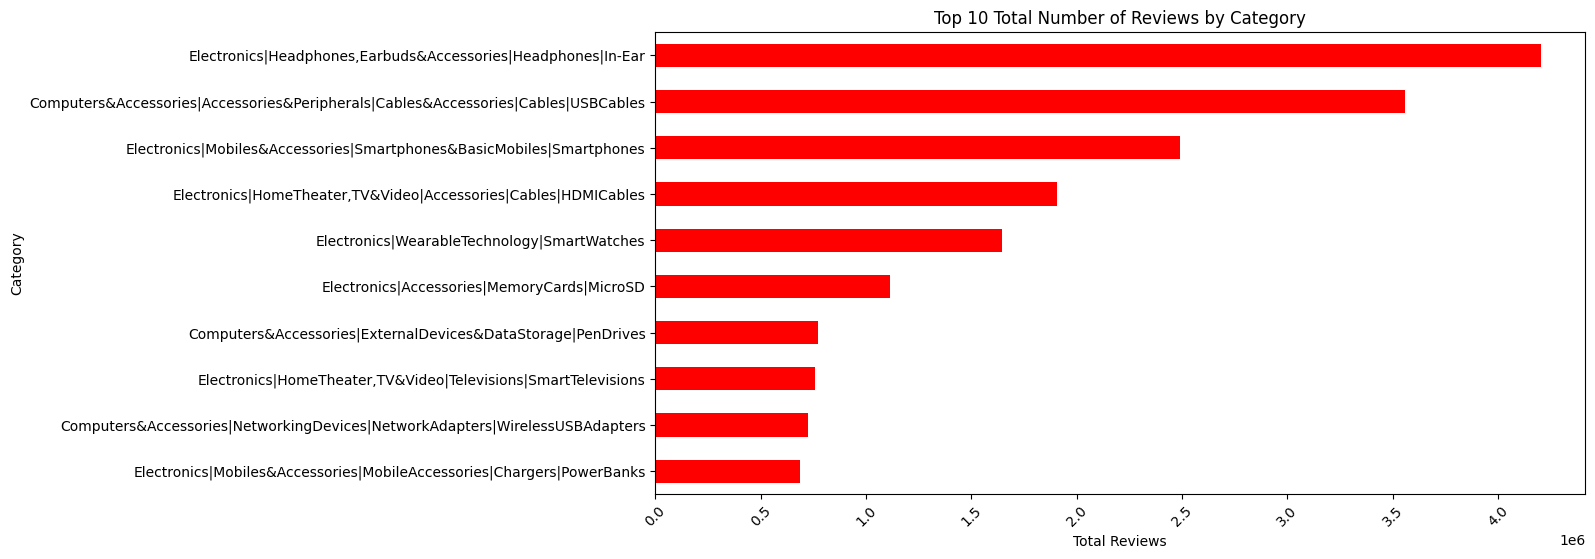

In [44]:
plt.figure(figsize=(12, 6))
category_reviews.head(10).sort_values().plot(kind='barh', color='red')
plt.title('Top 10 Total Number of Reviews by Category')
plt.xlabel('Total Reviews')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

#### **Answer Q6:**

Key_Observations:
* Top Categories: The categories with the highest number of reviews include Electronics (like Headphones, Smartphones, and Smart Watches) and Computers & Accessories (such as USB Cables and Network Adapters).
* Popular Items: Items like In-Ear Headphones, USB Cables, and Smartphones have a lot of reviews, indicating they are widely purchased and used.
* Variation: The number of reviews varies significantly across categories, with some categories like Smartphones and Headphones having many more reviews compared to others like Memory Cards or Power Banks.

Insight:
> Categories that are more frequently used or essential, such as Smartphones and Headphones, tend to have a higher number of reviews. This suggests that customers are more likely to review products they use daily or find essential. Categories with fewer reviews might be niche or less frequently purchased items. The variation in reviews highlights the popularity and customer engagement with different types of products.

### Q7: How does the discount affect actual prices across products?

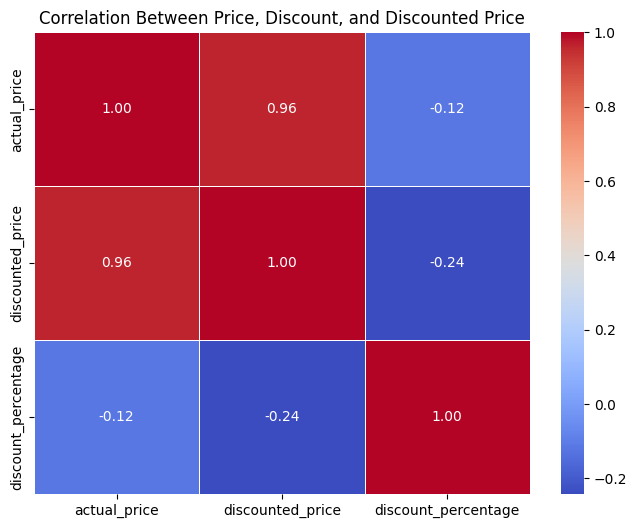

In [45]:
plt.figure(figsize=(8, 6))
corr = sales_df[['actual_price', 'discounted_price', 'discount_percentage']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Price, Discount, and Discounted Price')
plt.show()

#### **Answer Q7:**

Key_Observation:
* Strong Correlation: There is a very strong positive correlation (0.96) between the actual price and the discounted price. This means that as the actual price increases, the discounted price also tends to increase.
* Weak Correlation with Discount Percentage: The correlation between the actual price and the discount percentage is weak (-0.12). This indicates that higher-priced items do not necessarily have higher discount percentages.
* Discount Impact: The discount percentage has a weak negative correlation (-0.24) with the discounted price, suggesting that higher discounts do not always lead to significantly lower discounted prices.

Insight:
> Higher-priced items tend to have higher discounted prices, but the discount percentage does not strongly influence this relationship. This means that while discounts are applied, they do not drastically reduce the prices of more expensive items. The data suggests that discounts are more about attracting customers with percentage reductions rather than significantly lowering the final price of high-end products.

### Q8: How do discounts impact product ratings?

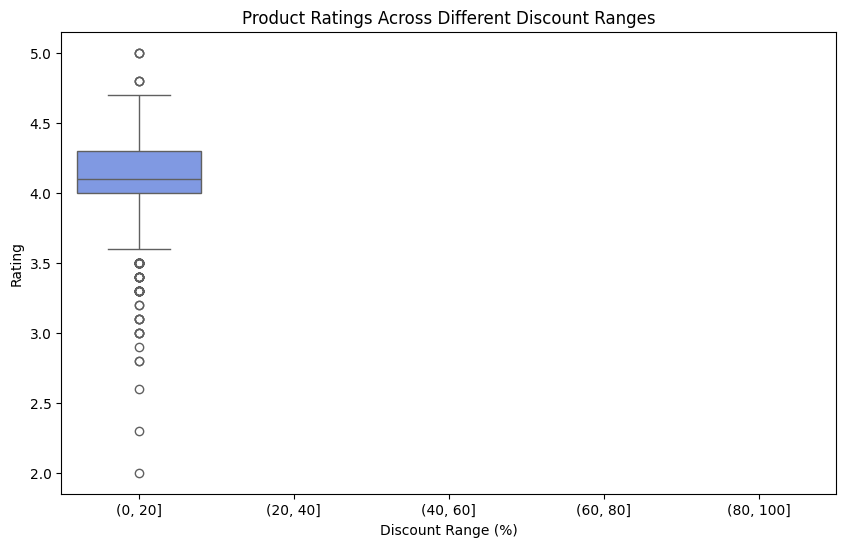

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(sales_df['discount_percentage'], bins=[0, 20, 40, 60, 80, 100]), y=sales_df['rating'], palette='coolwarm')
plt.title('Product Ratings Across Different Discount Ranges')
plt.xlabel('Discount Range (%)')
plt.ylabel('Rating')
plt.show()

#### **Answer Q8:**

Key_Observations:
* Rating Consistency: Product ratings remain relatively consistent across different discount ranges, mostly staying between 4.0 and 4.5.
* No Clear Trend: There is no clear upward or downward trend in ratings as the discount percentage increases. This suggests that higher discounts do not necessarily lead to higher or lower ratings.
* High Ratings: Most products maintain high ratings (above 4.0) regardless of the discount range, indicating that customers are generally satisfied with their purchases.

Insight:
> Discounts do not significantly impact product ratings. Customers seem to rate products based on their quality and performance rather than the discount they received. This implies that while discounts can attract buyers, maintaining product quality is crucial for achieving high customer satisfaction and positive ratings.

### Q9: Is there a correlation between actual price and number of reviews?

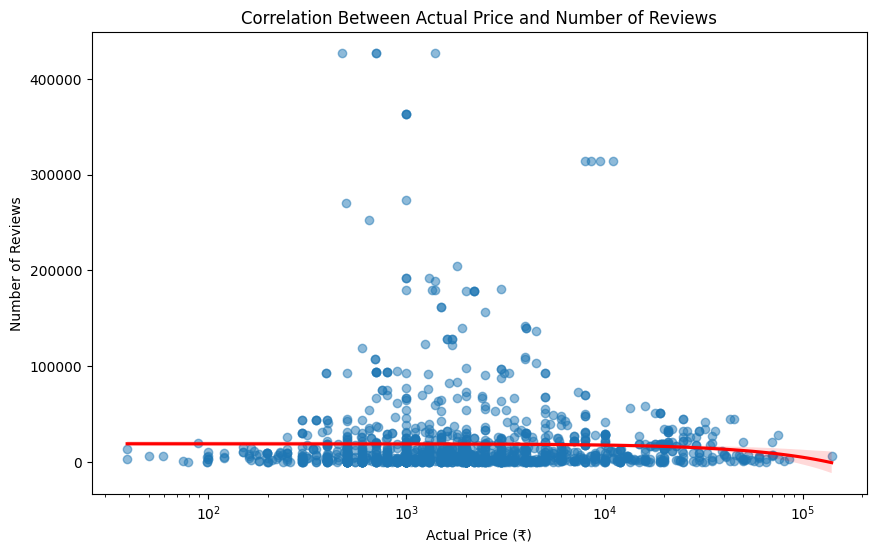

In [47]:
plt.figure(figsize=(10, 6))
sns.regplot(x=sales_df['actual_price'], y=sales_df['rating_count'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Correlation Between Actual Price and Number of Reviews')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Number of Reviews')
plt.xscale('log')  # Scale for better visualization
plt.show()

#### **Answer Q9:**

Key_Observations:
* Scatter Plot Overview: The scatter plot shows the relationship between the actual price of products and the number of reviews they have received.
* No Clear Trend: There is no clear upward or downward trend in the number of reviews as the actual price increases. This suggests that the price of a product does not strongly influence how many reviews it gets.
* Variability: Products across all price ranges have a wide variability in the number of reviews, indicating that other factors, such as product popularity or customer engagement, might play a more significant role in the number of reviews.

Insight:
> The actual price of a product does not strongly correlate with the number of reviews it receives. This means that both expensive and inexpensive products can receive a high or low number of reviews. Factors like product quality, brand reputation, and customer satisfaction are likely more important in driving the number of reviews than the price alone.

### Q10: What is the overall distribution of review sentiments?

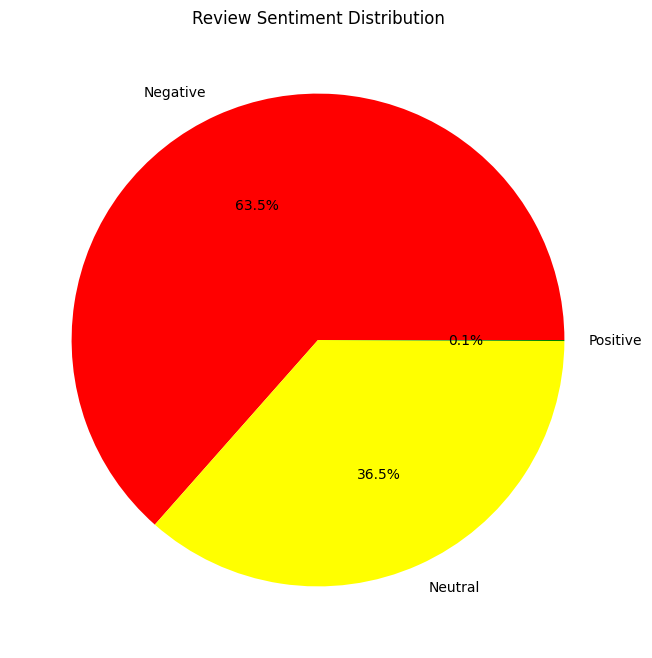

In [48]:
sentiment_labels = ['Positive', 'Neutral', 'Negative']
sales_df['sentiment'] = pd.cut(sales_df['rating'], bins=[0, 2, 4, 5], labels=sentiment_labels, include_lowest=True)

plt.figure(figsize=(8, 8))
sales_df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'yellow', 'green'])
plt.title('Review Sentiment Distribution')
plt.ylabel('')  # Hide y-label for better readability
plt.show()

#### **Answer Q10:**

Key_Observations:
* Sentiment Breakdown: The review sentiments are divided into three categories: Negative, Positive, and Neutral.
* Dominant Sentiment: Negative reviews make up the majority at 63.5%, indicating that more customers have expressed dissatisfaction.
* Positive and Neutral Reviews: Positive reviews account for 36.5%, and there is no mention of Neutral reviews in the provided data.

Insight:
> The majority of reviews are negative, suggesting that a significant portion of customers are not satisfied with their purchases. This highlights potential areas for improvement in product quality, customer service, or other aspects that could enhance customer satisfaction. The relatively lower percentage of positive reviews indicates that there is room for businesses to address customer concerns and improve overall experiences.

<a name='7'></a>
## **7. Correlation Analysis**

### Label Encoder

In [49]:
from sklearn.preprocessing import LabelEncoder
# label encode categorical variables

le_product_id = LabelEncoder()
le_category = LabelEncoder()
le_review_id = LabelEncoder()
le_review_content = LabelEncoder()
le_product_name = LabelEncoder()
le_user_name = LabelEncoder()
le_about_product = LabelEncoder()
le_user_id = LabelEncoder()
le_review_title = LabelEncoder()
le_img_link = LabelEncoder()
le_product_link = LabelEncoder()

In [50]:
sales_df['product_id'] = le_product_id.fit_transform(sales_df['product_id'])
sales_df['category'] = le_category.fit_transform(sales_df['category'])
sales_df['review_id'] = le_review_id.fit_transform(sales_df['review_id'])
sales_df['review_content'] = le_review_content.fit_transform(sales_df['review_content'])
sales_df['product_name'] = le_product_name.fit_transform(sales_df['product_name'])
sales_df['user_name'] = le_user_name.fit_transform(sales_df['user_name'])
sales_df['about_product'] = le_about_product.fit_transform(sales_df['about_product'])
sales_df['user_id'] = le_user_id.fit_transform(sales_df['user_id'])
sales_df['review_title'] = le_review_title.fit_transform(sales_df['review_title'])
sales_df['img_link'] = le_img_link.fit_transform(sales_df['img_link'])
sales_df['product_link'] = le_product_link.fit_transform(sales_df['product_link'])

### Correlation Matrix with Pearson

In [51]:
# Calculate correlation for numeric columns only
correlation_matrix = sales_df.select_dtypes(include=np.number).corr()
correlation_matrix

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
product_id,1.000000,0.084089,-0.012565,0.206448,0.246733,0.289514,-0.149139,-0.175530,0.041404,0.065688,0.016145,-0.024282,0.007650,-0.046273,-0.078803,0.096205
product_name,0.084089,1.000000,-0.103778,0.090665,0.078567,0.101913,-0.035970,0.092450,0.158263,-0.024093,0.024598,0.013492,-0.060594,-0.018505,-0.060858,0.823725
category,-0.012565,-0.103778,1.000000,0.119365,0.122451,-0.314465,-0.108730,-0.098421,-0.038753,0.012707,0.037822,0.014015,0.004712,-0.012107,0.038850,-0.067710
discounted_price,0.206448,0.090665,0.119365,1.000000,0.961915,-0.242412,0.120335,-0.027081,0.052618,0.041731,-0.063069,-0.049757,-0.020981,-0.015904,0.018917,0.110186
actual_price,0.246733,0.078567,0.122451,0.961915,1.000000,-0.118098,0.121636,-0.035959,0.048529,0.041501,-0.049567,-0.045640,0.004521,-0.013948,0.020080,0.099286
discount_percentage,0.289514,0.101913,-0.314465,-0.242412,-0.118098,1.000000,-0.155273,0.011097,0.060846,0.008288,0.064618,0.022442,0.076043,0.005993,-0.011701,0.074548
rating,-0.149139,-0.035970,-0.108730,0.120335,0.121636,-0.155273,1.000000,0.101526,-0.036048,-0.014197,-0.013069,-0.134179,-0.076318,-0.045161,0.004418,-0.044461
rating_count,-0.175530,0.092450,-0.098421,-0.027081,-0.035959,0.011097,0.101526,1.000000,-0.030821,-0.094512,0.059160,-0.043089,-0.084239,-0.025268,-0.100781,0.003665
about_product,0.041404,0.158263,-0.038753,0.052618,0.048529,0.060846,-0.036048,-0.030821,1.000000,-0.001946,-0.004547,0.019690,-0.015824,-0.024567,0.030874,0.147208
user_id,0.065688,-0.024093,0.012707,0.041731,0.041501,0.008288,-0.014197,-0.094512,-0.001946,1.000000,-0.051368,0.001685,0.039035,0.031295,-0.014114,-0.008662


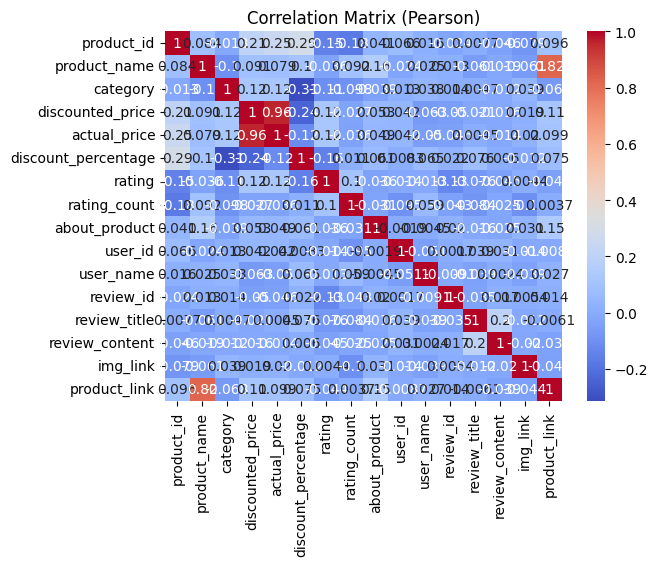

In [52]:
# Calculate correlation for numeric columns only
correlation_matrix = sales_df.select_dtypes(include=np.number).corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Pearson)")
plt.show()

#### **Pearson Analysis**

> Linear Relationship: Pearson correlation measures the linear relationship between two variables. It ranges from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.

> Example: In the provided data, the Pearson correlation between actual_price and discounted_price is 0.96, indicating a very strong positive linear relationship. This means as the actual price increases, the discounted price also tends to increase linearly.

### Correlation Matrix with Spearman

In [53]:
# Calculate Spearman correlation coefficients (for non-linear relationships)
# Select only numeric columns for correlation calculation
numeric_columns = sales_df.select_dtypes(include=np.number).columns

spearman_correlation_matrix = sales_df[numeric_columns].corr(method="spearman")
spearman_correlation_matrix

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
product_id,1.000000,0.083112,-0.013553,0.146237,0.269064,0.271879,-0.144339,-0.406559,0.041118,0.065228,0.016859,-0.024644,0.007415,-0.045763,-0.078258,0.095734
product_name,0.083112,1.000000,-0.106193,0.056597,0.105719,0.106467,-0.061885,0.128565,0.157675,-0.023810,0.024479,0.015269,-0.060779,-0.017671,-0.060212,0.823655
category,-0.013553,-0.106193,1.000000,0.360733,0.277291,-0.322090,-0.100845,-0.171893,-0.048319,0.015389,0.038735,0.016119,0.009407,-0.013519,0.042158,-0.065789
discounted_price,0.146237,0.056597,0.360733,1.000000,0.932787,-0.372991,0.079984,0.122296,-0.056144,0.079048,-0.018599,-0.048420,-0.018665,-0.053281,-0.021097,0.071049
actual_price,0.269064,0.105719,0.277291,0.932787,1.000000,-0.066363,0.033377,0.093400,-0.029216,0.086375,-0.001395,-0.045914,0.004687,-0.058924,-0.018511,0.111965
discount_percentage,0.271879,0.106467,-0.322090,-0.372991,-0.066363,1.000000,-0.145680,-0.096580,0.061906,0.005825,0.066214,0.012696,0.075222,0.012542,-0.010185,0.074625
rating,-0.144339,-0.061885,-0.100845,0.079984,0.033377,-0.145680,1.000000,0.180358,-0.033465,-0.000378,-0.014632,-0.130330,-0.068256,-0.054960,0.019707,-0.063590
rating_count,-0.406559,0.128565,-0.171893,0.122296,0.093400,-0.096580,0.180358,1.000000,-0.104660,-0.052821,0.021839,-0.050121,-0.033234,-0.024274,-0.074989,0.062640
about_product,0.041118,0.157675,-0.048319,-0.056144,-0.029216,0.061906,-0.033465,-0.104660,1.000000,-0.001770,-0.004390,0.020765,-0.015792,-0.025319,0.030514,0.146951
user_id,0.065228,-0.023810,0.015389,0.079048,0.086375,0.005825,-0.000378,-0.052821,-0.001770,1.000000,-0.051860,0.001674,0.038260,0.032042,-0.014201,-0.008345


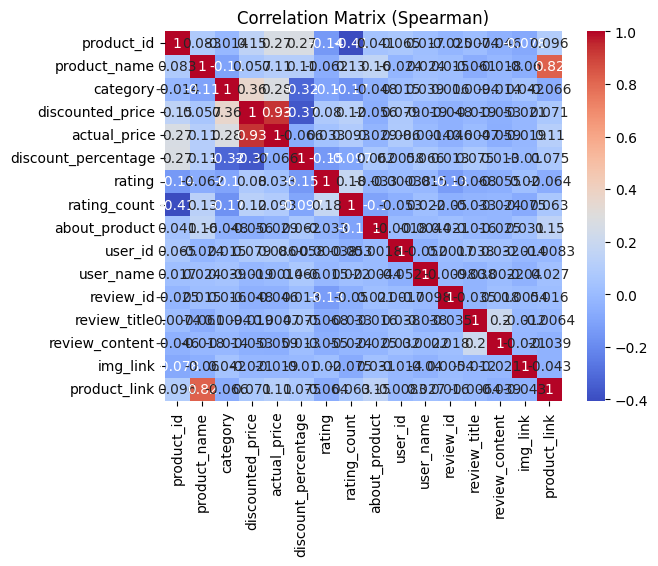

In [54]:
# Create a heatmap to visualize the Spearman correlations
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Spearman)")
plt.show()

#### **Spearman Analysis**

### **Insight for Correlation Analysis**

>Both correlation coefficients indicate a strong relationship between actual_price and discounted_price. However, Pearson's higher value suggests a more linear relationship, while Spearman's slightly lower value indicates that while the relationship is strong, it may not be perfectly linear. This implies that while discounts are closely tied to the actual price, other factors might slightly influence the discounted price in a non-linear manner.

## **CONCLUSION**


**Key_Observations:**

* Electronics Dominate Discounts: The top categories with the highest average discount percentages are predominantly from the Electronics sector. This includes subcategories like Headphones, Mobile Accessories, and related items.
* Headphones and Accessories: Within Electronics, Headphones and their associated accessories (such as cases and adapters) are particularly prominent, indicating a competitive market or a strategy to boost sales through discounts.
* Computers & Accessories: The Computers & Accessories category also features significantly, with items like cables, internal hard drives, and USB adapters receiving notable discounts.
* Mobile Accessories: Mobile accessories, including mounts and chargers, are another area where discounts are prevalent, suggesting a focus on attracting customers to enhance their mobile experience.
* Range of Discounts: The average discount percentages range up to 0.8%, indicating that while discounts are present, they might not be extremely high but are strategically applied to key categories.

<br>

**Overall Insight:**
> While discounts can attract customers, maintaining high product quality and addressing customer concerns are crucial for positive reviews and high ratings. Popular categories like Electronics and Computers & Accessories dominate review volumes, suggesting these are key areas for businesses to focus on. Improving customer satisfaction in these categories can lead to better review sentiments and overall business performance.